Load the `ISLR2` and `tidyverse` packages.

In [1]:
library(ISLR2)
library(tidyverse)
library(tidymodels) # needed to create the model in the last part

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1  

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

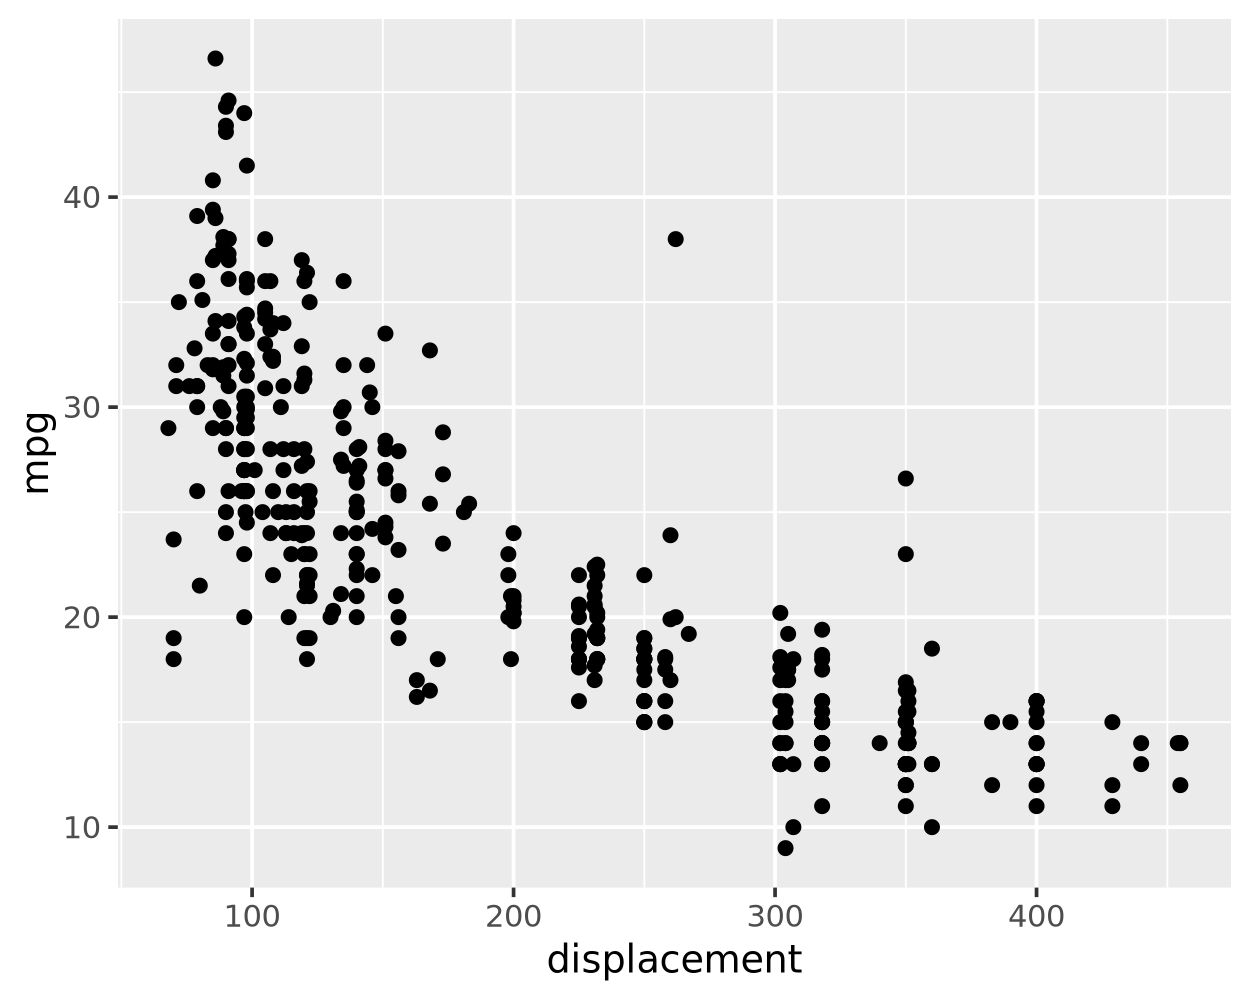

In [3]:
ggplot(Auto) +
    geom_point(aes(y = mpg, x = displacement))

❓Does the relationship of `mpg` to `displacement` look linear?

**Answer:**

Looking at the relationship between `mpg` and `displacement` we can see that the relationship looks like a negative **nonlinear** relationship. 

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [4]:
mod = linear_reg() |> set_engine('lm')

rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement, deg_free = 5) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    prep()

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


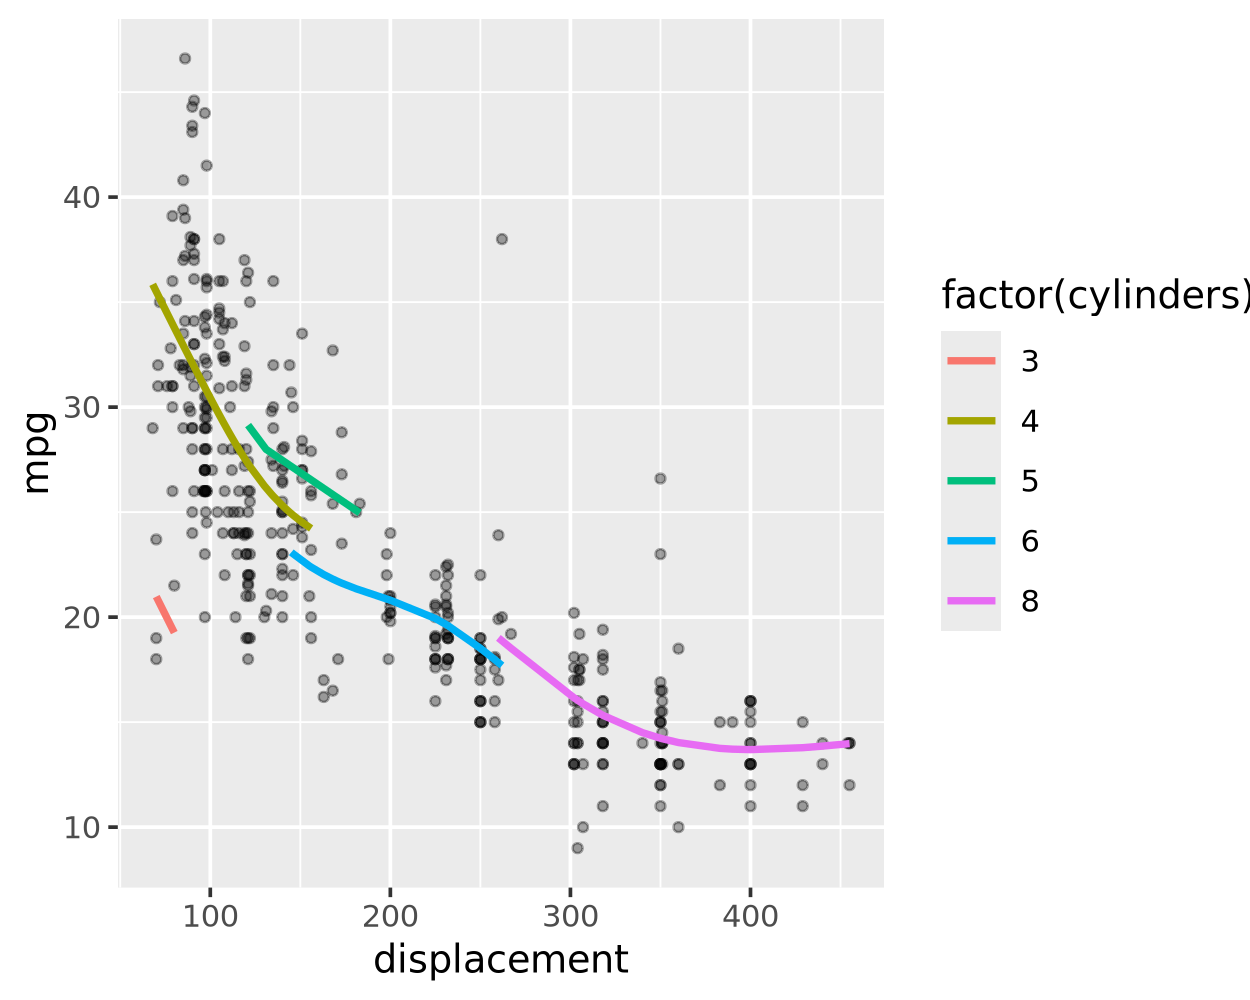

In [5]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)